# StainTools

In [1]:
import staintools

In [7]:
# Read data
target = staintools.read_image("Slices/i1.png")
to_transform = staintools.read_image("Slices/i1.png")

# Standardize brightness (optional, can improve the tissue mask calculation)
target = staintools.LuminosityStandardizer.standardize(target)
to_transform = staintools.LuminosityStandardizer.standardize(to_transform)

# Stain normalize
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
transformed = normalizer.transform(to_transform)

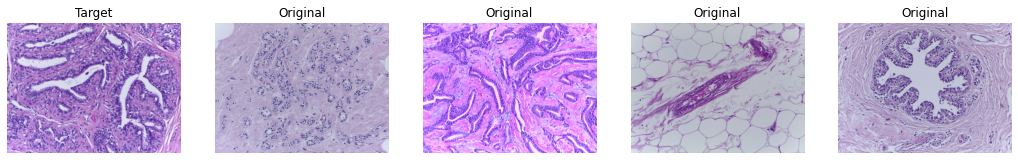

In [6]:
import staintools
import datetime

# Set up
METHOD = 'vahadane'
STANDARDIZE_BRIGHTNESS = True
RESULTS_DIR = 'Desktop/JupyterLab/Slices/' + str(datetime.datetime.now()) + '/'

# Read the images
i1 = staintools.read_image("Slices/i1.png")
i2 = staintools.read_image("Slices/i2.png")
i3 = staintools.read_image("Slices/i3.png")
i4 = staintools.read_image("Slices/i4.png")
i5 = staintools.read_image("Slices/i5.png")

# Plot
images = [i1, i2, i3, i4, i5]
titles = ["Target"] + ["Original"] * 4
#staintools.plot_image_list(images, width=5, title_list=titles, save_name=RESULTS_DIR + 'original-images.png', show=0)
#def plot_image_list(images, width=5, sub_sample=False, rand=False, save_name=None, title_list=None, show=True):
staintools.plot_image_list(images, width=5, title_list=titles, save_name=None, show=True)


In [3]:
target = staintools.LuminosityStandardizer.standardize(i1)

In [10]:
#stain_matrix_ABC_i1 = staintools.ABCStainExtractor.get_stain_matrix(i1)
stain_matrix_Macenko_i1 = staintools.MacenkoStainExtractor.get_stain_matrix(i1, luminosity_threshold=0.8, angular_percentile=99)
stain_matrix_Vahadane_i1 = staintools.VahadaneStainExtractor.get_stain_matrix(i1, luminosity_threshold=0.8, regularizer=0.1)
#staintools.normalization.macenko.MacenkoNormalizer

In [35]:
stain_norm_insta_i1 = staintools.StainNormalizer(method='macenko')

In [36]:
print(stain_norm_insta_i1.extractor)

<class 'staintools.stain_extraction.macenko_stain_extractor.MacenkoStainExtractor'>


In [42]:
print(stain_norm_insta_i1.target_concentrations)

[[0.0862711  0.10579802]
 [0.08191594 0.11097675]
 [0.12354121 0.09632045]
 ...
 [0.         0.47023082]
 [0.02182887 0.45725606]
 [0.06815006 0.39924575]]


In [37]:
i1_fit = stain_norm_insta_i1.fit(i1)

In [39]:
print(i1_fit.get_concentrations)

AttributeError: 'NoneType' object has no attribute 'get_concentrations'

In [45]:
stain_norm_insta_i2 = staintools.StainNormalizer(method='macenko')
stain_norm_insta_i2.fit(i2)
print(stain_norm_insta_i2.target_concentrations)

[[0.19642103 0.        ]
 [0.20651118 0.        ]
 [0.20746513 0.        ]
 ...
 [0.19894648 0.        ]
 [0.1905017  0.        ]
 [0.1883289  0.        ]]


In [25]:
stain_norm_fit_i1 = staintools.StainNormalizer.transform('macenko',i1)
print(stain_norm_fit_i1)

AttributeError: 'str' object has no attribute 'extractor'

In [18]:
inspect.getmembers(stain_norm_fit_i1, predicate=inspect.ismethod)

[]

In [12]:
inspect.getmembers(staintools.StainNormalizer.fit)

[('__annotations__', {}),
 ('__call__',
  <method-wrapper '__call__' of function object at 0x000001C80353D0D0>),
 ('__class__', function),
 ('__closure__', None),
 ('__code__',
  <code object fit at 0x000001C80352E7C0, file "C:\Users\jacob\anaconda3\lib\site-packages\staintools\stain_normalizer.py", line 19>),
 ('__defaults__', None),
 ('__delattr__',
  <method-wrapper '__delattr__' of function object at 0x000001C80353D0D0>),
 ('__dict__', {}),
 ('__dir__', <function function.__dir__()>),
 ('__doc__',
  '\n        Fit to a target image.\n\n        :param target: Image RGB uint8.\n        :return:\n        '),
 ('__eq__',
  <method-wrapper '__eq__' of function object at 0x000001C80353D0D0>),
 ('__format__', <function function.__format__(format_spec, /)>),
 ('__ge__',
  <method-wrapper '__ge__' of function object at 0x000001C80353D0D0>),
 ('__get__',
  <method-wrapper '__get__' of function object at 0x000001C80353D0D0>),
 ('__getattribute__',
  <method-wrapper '__getattribute__' of funct

In [2]:
print(staintools)
import inspect
inspect.getmembers(staintools)

<module 'staintools' from 'C:\\Users\\jacob\\anaconda3\\lib\\site-packages\\staintools\\__init__.py'>


[('LuminosityStandardizer',
  staintools.preprocessing.luminosity_standardizer.LuminosityStandardizer),
 ('MacenkoStainExtractor',
  staintools.stain_extraction.macenko_stain_extractor.MacenkoStainExtractor),
 ('ReinhardColorNormalizer',
  staintools.reinhard_color_normalizer.ReinhardColorNormalizer),
 ('StainAugmentor', staintools.stain_augmentor.StainAugmentor),
 ('StainNormalizer', staintools.stain_normalizer.StainNormalizer),
 ('VahadaneStainExtractor',
  staintools.stain_extraction.vahadane_stain_extractor.VahadaneStainExtractor),
 ('__builtins__',
  {'__name__': 'builtins',
   '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
   '__package__': '',
   '__loader__': _frozen_importlib.BuiltinImporter,
   '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in'),
   '__build_class__': <function __build_class__>,
   '__import__': <function _

In [19]:
#def get_concentrations(I, stain_matrix, regularizer=0.01):
 
concentration_i1 = staintools.FancyNormalizer.get_concentrations(i1, stain_matrix_Vahadane_i1, regularizer=0.01)
print(concentration_i1)

AttributeError: module 'staintools' has no attribute 'FancyNormalizer'

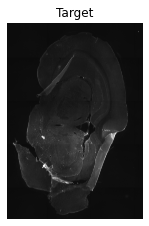

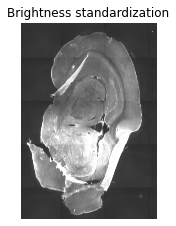

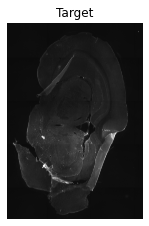

In [19]:
s1 = staintools.read_image("Slices/slice-t1.png")
staintools.plot_image_list(images=[s1], width=5, title_list=["Target"], save_name=None, show=True)

s1_bright = staintools.LuminosityStandardizer.standardize(s1)
staintools.plot_image_list(images=[s1_bright], width=5, title_list=["Brightness standardization"], save_name=None, show=True)

# Normalize to stain of first image
#normalizer = staintools.StainNormalizer(method=METHOD)
#normalizer.fit(s1)
#s1_bright_normalized = normalizer.transform(s1_bright)
#staintools.plot_image_list(images=[s1_bright_normalized], width=5, title_list=["Stain normalization"], save_name=None, show=True)

# Augment the first image
augmentor = staintools.StainAugmentor(method=METHOD, sigma1=0.4, sigma2=0.4)
augmentor.fit(s1)
staintools.plot_image_list(images=[s1], width=5, title_list=["Target"], save_name=None, show=True)

In [21]:
print(s1_bright.shape)
print(s1_bright[0])

(4170, 2878, 3)
[[105 105 105]
 [111 111 111]
 [105 105 105]
 ...
 [105 105 105]
 [102 102 102]
 [102 102 102]]


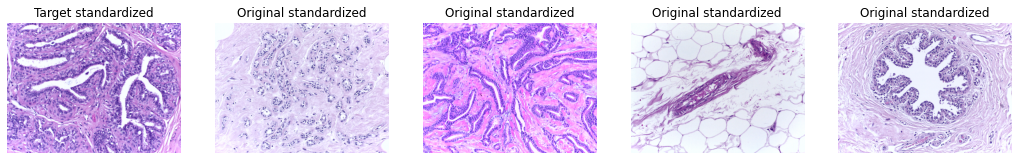

In [16]:
# =========================
# Brightness standardization
# (Can skip but can help with tissue mask detection)
# =========================

if STANDARDIZE_BRIGHTNESS:
    # Standardize brightness
    i1 = staintools.LuminosityStandardizer.standardize(i1)
    i2 = staintools.LuminosityStandardizer.standardize(i2)
    i3 = staintools.LuminosityStandardizer.standardize(i3)
    i4 = staintools.LuminosityStandardizer.standardize(i4)
    i5 = staintools.LuminosityStandardizer.standardize(i5)

    # Plot
    images = [i1, i2, i3, i4, i5]
    titles = ["Target standardized"] + ["Original standardized"] * 4
    #staintools.plot_image_list(images, width=5, title_list=titles, save_name=RESULTS_DIR + 'original-images-standardized.png', show=0)
    staintools.plot_image_list(images, width=5, title_list=titles, save_name=None, show=True)

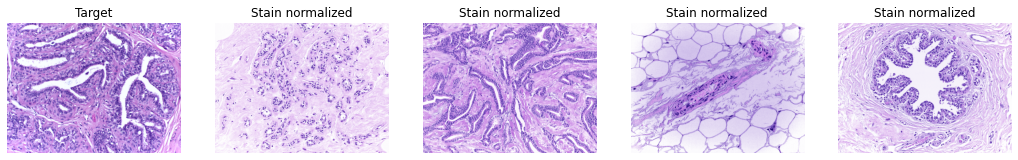

In [17]:
# ===================
# Stain normalization
# ===================

# Normalize to stain of first image
normalizer = staintools.StainNormalizer(method=METHOD)
normalizer.fit(i1)
i2_normalized = normalizer.transform(i2)
i3_normalized = normalizer.transform(i3)
i4_normalized = normalizer.transform(i4)
i5_normalized = normalizer.transform(i5)

# Plot
images = [i1, i2_normalized, i3_normalized, i4_normalized, i5_normalized]
titles = ["Target"] + ["Stain normalized"] * 4
#staintools.plot_image_list(images, width=5, title_list=titles, save_name=RESULTS_DIR + 'stain-normalized-images.png', show=0)
staintools.plot_image_list(images, width=5, title_list=titles, save_name=None, show=True)

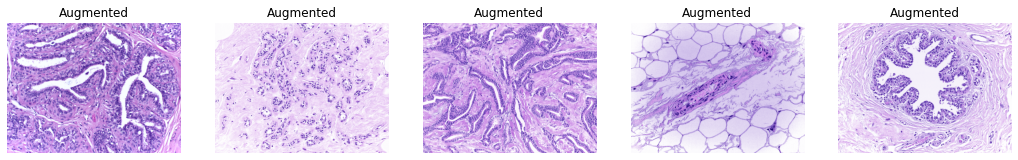

In [18]:
# ==================
# Stain augmentation
# ==================

# Augment the first image
augmentor = staintools.StainAugmentor(method=METHOD, sigma1=0.4, sigma2=0.4)
augmentor.fit(i1)
augmented_images = []
for _ in range(10):
    augmented_image = augmentor.pop()
    augmented_images.append(augmented_image)

# Plot
titles = ["Augmented"] * 10
#staintools.plot_image_list(augmented_images, width=5, title_list=titles,save_name=RESULTS_DIR + 'stain-augmented-images.png', show=0)
staintools.plot_image_list(images, width=5, title_list=titles, save_name=None, show=True)

In [ ]:
def plot_image(image, show=True, fig_size=10, title=None):
    
def get_concentrations(I, stain_matrix, regularizer=0.01):


In [19]:
print(i1.shape)

(1536, 2048, 3)


In [23]:
is_this_image = staintools.is_image(i1)
is_this_image_unit8 = is_uint8_image(i1)
print(is_this_image_unit8)

AttributeError: module 'staintools' has no attribute 'is_image'

In [ ]:
stain_matrix_i1 = staintools.ABCStainExtractor.get_stain_matrix(i1)